In [1]:
import nltk
from konlpy.tag import Twitter
from matplotlib import font_manager, rc
import platform
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from wordcloud import STOPWORDS

from collections import Counter


In [2]:
#텍스트 데이터 읽기
with open('data.txt','r') as inputfile:
    data=inputfile.read()
# print(data)

#csv 파일일경우
'''
with open("sample.csv") as f:
    lines = f.readlines() 
data = "".join(lines)
'''


'\nwith open("sample.csv") as f:\n    lines = f.readlines() \ndata = "".join(lines)\n'

In [3]:
# 글꼴 지정

if platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
elif platform.system()=='Windows' :
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:
    print('unknown system')

In [4]:
# stopword = set(STOPWORDS)
# stopword.add("최씨")

In [5]:
%matplotlib inline

stopwords=['최씨']

t=Twitter()
nouns=t.nouns(data)  # 명사만 분류하기


ko=nltk.Text(nouns,name="분석")   
print(type(ko))
ranking=ko.vocab().most_common(100)   #노출 상위 10개
tmp = dict(ranking)
print(ranking)
# print(tmp)

<class 'nltk.text.Text'>
[('호갱', 33), ('국민', 31), ('요금', 30), ('폰', 28), ('단말기', 22), ('유심', 21), ('최씨', 20), ('통신사', 18), ('만원', 18), ('년', 17), ('제', 17), ('원', 16), ('전', 15), ('휴대폰', 15), ('증거', 15), ('자급', 15), ('거', 14), ('때', 14), ('사람', 14), ('여자', 13), ('더', 13), ('김현중', 13), ('가격', 13), ('해', 13), ('것', 13), ('재판', 13), ('그냥', 13), ('사', 12), ('뭐', 12), ('좀', 12), ('말', 11), ('사기', 11), ('우리', 10), ('완전', 10), ('기사', 10), ('이', 10), ('소비자', 10), ('지금', 10), ('배', 10), ('시장', 9), ('수', 9), ('통신', 9), ('월', 9), ('왜', 9), ('통신비', 9), ('그', 9), ('보조금', 9), ('개', 8), ('억', 8), ('약정', 8), ('와', 8), ('임신', 8), ('이통', 8), ('인하', 8), ('폭리', 8), ('한국', 8), ('천원', 7), ('급제', 7), ('일', 7), ('얼마', 7), ('돈', 7), ('정부', 7), ('치', 7), ('정보', 7), ('판결', 7), ('유통', 7), ('또', 7), ('우리나라', 6), ('진짜', 6), ('값', 6), ('제로', 6), ('임', 6), ('보고', 6), ('무슨', 6), ('형사재판', 6), ('니', 6), ('게', 6), ('경찰', 6), ('너무', 6), ('불법', 6), ('북한', 6), ('테러', 6), ('안', 6), ('모두', 6), ('시간', 6), ('폭행', 6), ('경쟁', 6),

In [65]:
%matplotlib inline

stopwords=['최씨','제','년','전','때','거','것','해','더','뭐','사']
# stopwords=[]

t=Twitter()
nouns=t.nouns(data)  # 명사만 분류하기
counts = Counter(nouns)
noun_lists=counts.most_common(200)   #적당수로 계산함
refined_nouns=[]
for noun in noun_lists:
    if noun[0] in stopwords:
        continue
    refined_nouns.append(noun)

print(refined_nouns)

[('호갱', 33), ('국민', 31), ('요금', 30), ('폰', 28), ('단말기', 22), ('유심', 21), ('통신사', 18), ('만원', 18), ('원', 16), ('휴대폰', 15), ('자급', 15), ('증거', 15), ('사람', 14), ('그냥', 13), ('가격', 13), ('김현중', 13), ('여자', 13), ('재판', 13), ('좀', 12), ('사기', 11), ('말', 11), ('기사', 10), ('우리', 10), ('완전', 10), ('소비자', 10), ('배', 10), ('지금', 10), ('이', 10), ('왜', 9), ('월', 9), ('시장', 9), ('보조금', 9), ('통신비', 9), ('그', 9), ('수', 9), ('통신', 9), ('와', 8), ('약정', 8), ('이통', 8), ('폭리', 8), ('인하', 8), ('개', 8), ('한국', 8), ('억', 8), ('임신', 8), ('정보', 7), ('돈', 7), ('얼마', 7), ('일', 7), ('천원', 7), ('유통', 7), ('치', 7), ('급제', 7), ('정부', 7), ('또', 7), ('판결', 7), ('경찰', 6), ('테러', 6), ('불법', 6), ('게', 6), ('무슨', 6), ('임', 6), ('니', 6), ('경쟁', 6), ('제로', 6), ('모두', 6), ('값', 6), ('우리나라', 6), ('안', 6), ('진짜', 6), ('북한', 6), ('너무', 6), ('보고', 6), ('시간', 6), ('형사재판', 6), ('폭행', 6), ('데이터', 6), ('기자', 5), ('나', 5), ('방지법', 5), ('사건', 5), ('법', 5), ('기업', 5), ('할인', 5), ('리', 5), ('출고', 5), ('입장', 5), ('누가', 5), ('사라', 5), ('조사

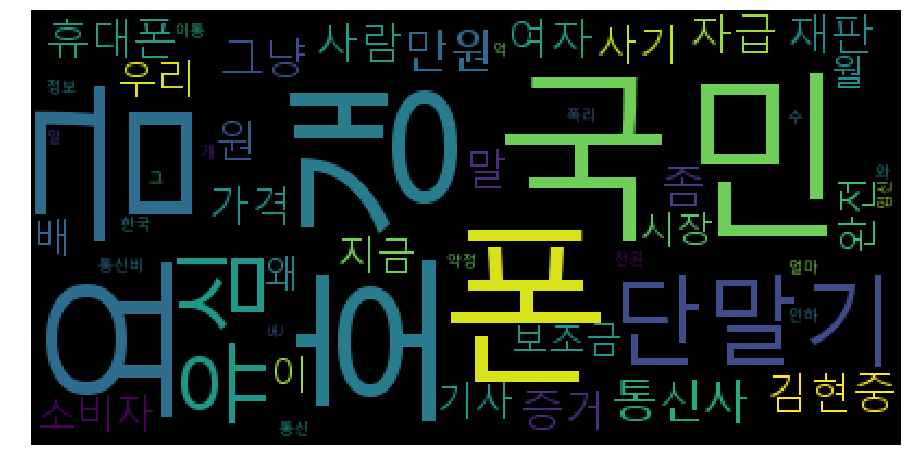

In [101]:

tmp = dict(refined_nouns)
wordcloud=WordCloud(font_path="c:/Windows/Fonts/malgun.ttf", relative_scaling=0.3, 
                    background_color="black", max_words=50,
                   font_step=10).generate_from_frequencies(tmp)
plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('sample(휴대폰)_black.png')

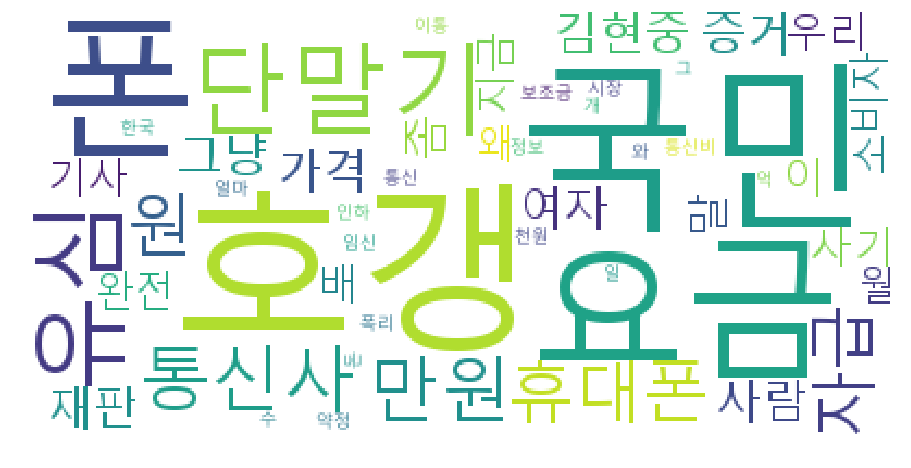

In [102]:
tmp = dict(refined_nouns)
wordcloud=WordCloud(font_path="c:/Windows/Fonts/malgun.ttf", relative_scaling=0.3, 
                    background_color="white", max_words=50,
                   font_step=10).generate_from_frequencies(tmp)
plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('sample(휴대폰)_white.png')

In [67]:
import numpy as np
from PIL import Image


In [68]:
symbol_mask = np.array(Image.open('./symbol/photo.jpg'))

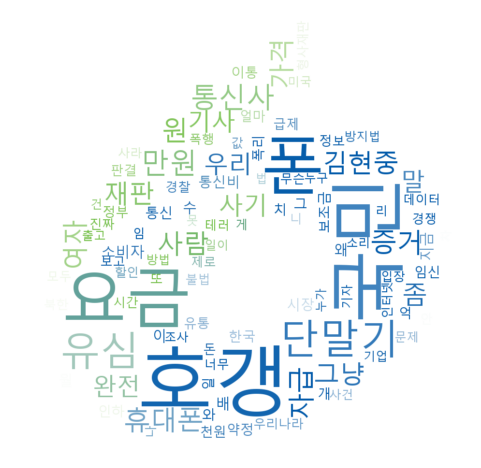

In [99]:
from wordcloud import ImageColorGenerator
image_colors = ImageColorGenerator(symbol_mask)

tmp = dict(refined_nouns)
wordcloud=WordCloud(font_path="c:/Windows/Fonts/malgun.ttf", relative_scaling=0.3, 
                    background_color="white", max_words=100,
                   mask = symbol_mask,font_step=20).generate_from_frequencies(tmp)
plt.figure(figsize=(16,8))
# plt.imshow(wordcloud, interpolation="bilinear")
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis('off')
plt.savefig('심볼(휴대폰).png')